In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv(filepath_or_buffer = r'C:\Users\Kseniia\Documents\Titanik_train.csv', 
            sep = ',')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe(include=['object']).T # только категориальные признаки

,count,unique,top,freq
Name,891,891,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [6]:
data.describe(include=['int64']).T # только вещественные

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0


# Предположение 1 - пассажиры первого класса преимуществено спаслись

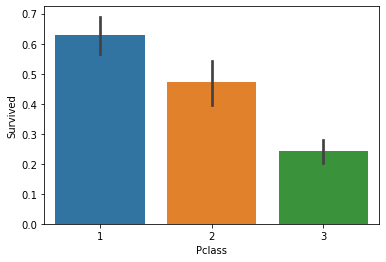

In [7]:
# построим график - да, процент выживших пассажиров 1ого класса выше остальных
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

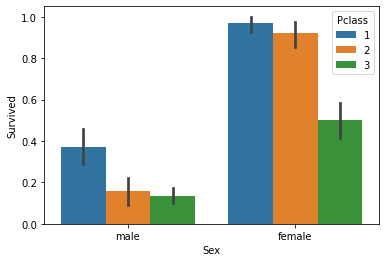

In [8]:
# построим более детальный график, доавив признак по полу
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=data)
plt.show()

Вывод 1 - преимущественно выжили женщины 1ого класса и чуть меньше - 2ого

In [9]:
#построим выборку 1.1 - женщины 1ого класса
data_1 = data[(data['Pclass'] == 1) & (data['Sex'] == 'female')]

In [10]:
# Вывод 1.1 - 96,8% женщин первого класса спаслись
D1 =  data_1.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D1['%'] = D1['sum'] / D1['size']*100
print (D1)

               sum  size          %
Sex    Pclass                      
female 1        91    94  96.808511


In [11]:
#построим выборку 1.2 - женщины 2ого класса
data_1 = data[(data['Pclass'] == 2) & (data['Sex'] == 'female')]

In [12]:
# Вывод 1.2 - 92,1% женщин второго класса спаслись
D2 =  data_1.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D2['%'] = D2['sum'] / D2['size']*100
print (D2)

               sum  size          %
Sex    Pclass                      
female 2        70    76  92.105263


In [13]:
#построим выборку 1.3 - женщины 1ого и 2ого класса вместе
data_2 = data[data.Pclass.isin([2, 1]) & (data['Sex'] == 'female')]

In [14]:
data_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [15]:
# Вывод 1.3 - 94,7% женщин 1 и 2 класса спаслись
D3 =  data_2.groupby(['Sex'])['Survived'].agg(['sum','size'])
D3['%'] = D3['sum'] / D3['size']*100
print (D3)

        sum  size          %
Sex                         
female  161   170  94.705882


## ВЫВОД 1 - преимущественно спаслись женщины 1 и 2 класса

# Предположение 2 - мужчины третьего и второго класса преимуществено погибли

In [16]:
data_3 = data[data.Pclass.isin([2, 3]) & (data['Sex'] == 'male')]

In [17]:
data_3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [18]:
D4 =  data_3.groupby(['Sex','Pclass'])['Survived'].agg(['sum','size'])
D4['%'] = D4['sum'] / D4['size']*100
print (D4)

             sum  size          %
Sex  Pclass                      
male 2        17   108  15.740741
     3        47   347  13.544669


In [19]:
D5 =  data_3.groupby(['Sex'])['Survived'].agg(['sum','size'])
D5['%'] = D5['sum'] / D5['size']*100
print (D5)

      sum  size          %
Sex                       
male   64   455  14.065934


## ВЫВОД 2 - преимущественно погибли мужчины 2 и 3 класса

# Предположение 3 - преимущественно спаслись дети с родителями

In [20]:
#пассажиры с детьми или родителями
data_4 = data[data.Parch.isin([1,2,3,4,5,6])]

In [21]:
data_4 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [22]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 7 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  213 non-null    int64  
 1   Survived     213 non-null    int64  
 2   Pclass       213 non-null    int64  
 3   Name         213 non-null    object 
 4   Sex          213 non-null    object 
 5   Age          193 non-null    float64
 6   SibSp        213 non-null    int64  
 7   Parch        213 non-null    int64  
 8   Ticket       213 non-null    object 
 9   Fare         213 non-null    float64
 10  Cabin        63 non-null     object 
 11  Embarked     213 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 21.6+ KB


In [23]:
#удалим наны в возрасте
data_4.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [24]:
# оставим неодиноких пассажиров от 18 лет и меньше,т.е. детей на борту с родителями
data_4 = data_4.groupby(["PassengerId"]).filter(lambda x: x['Age'] <19)

In [25]:
data_4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S


In [26]:
D6 =  data_4.groupby(['Sex', "Pclass"])['Survived'].agg(['sum','size'])
D6['%'] = D6['sum'] / D6['size']*100
print (D6)

               sum  size           %
Sex    Pclass                       
female 1         6     7   85.714286
       2        11    11  100.000000
       3        12    26   46.153846
male   1         4     4  100.000000
       2         9     9  100.000000
       3         8    32   25.000000


## ВЫВОД 3 - дети 1 и 2 класса были спасены вне зависимости от пола (исключение составляет одна девочка 1ого класса)
